In [34]:
import numpy as np
import matplotlib.pyplot as plt

(1) Find the solution of w and b using the standard linear least-squares (LLS) method. Plot out the fitting result.

[0.38733906 1.60944206]


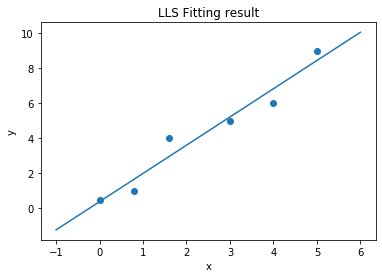

In [35]:
x = np.array([0, 0.8, 1.6, 3, 4.0, 5], dtype = float)
x_ = np.ones(x.shape[0])
x  = np.vstack((x_, x)).T
y = np.array([0.5, 1, 4, 5, 6, 9], dtype = float).T
w = np.linalg.inv(x.T.dot(x)).dot(x.T.dot(y)) 
print(w)
# plot
i = np.arange(-1, 7)
j = w[1]*i + w[0]
plt.scatter(x[:,1], y)
plt.plot(i, j)
plt.title("LLS Fitting result")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

(2) Suppose that initial weight is chosen randomly and learning rate is 0.01. Find the solution of w and b using the least-mean-square (LMS) algorithm for 100 epochs. Plot out the fitting result and the trajectories of the weights versus learning steps. Will the weights converge?

[0.36294148 1.62940456]


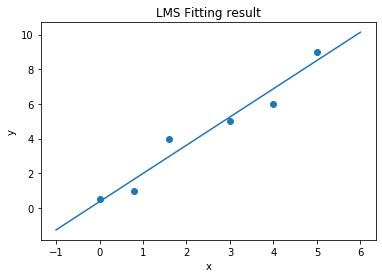

In [45]:
l_rate = 0.01
epoch = 100
w = np.random.randn(1,x.shape[1]).flatten()
w1_record = []
b_record = []

for i in range(epoch):
    w1_record.append(w[1])
    b_record.append(w[0])
    for j, label in enumerate(y):
        e = y[j] - x[j, :].dot(w)
        w = w + l_rate * e *(x[j])
        
print(w)
i = np.arange(-1, 7)
j = w[1]*i + w[0]
plt.scatter(x[:,1], y)
plt.plot(i, j)
plt.title("LMS Fitting result")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

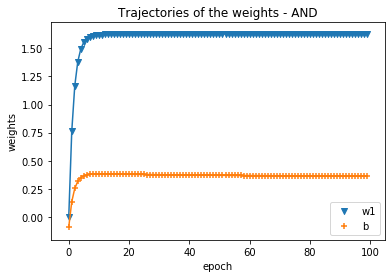

In [46]:
rge = np.array(range(100))
plt.scatter(rge,w1_record, label = 'w1', marker = 'v')
plt.plot(rge,w1_record)
plt.scatter(rge,b_record, label = 'b', marker = '+')
plt.plot(rge,b_record)
plt.title('Trajectories of the weights')
plt.xlabel("epoch")
plt.ylabel("weights")
plt.legend()
plt.show()

(3) Compare the results obtained by LLS and the LMS methods.

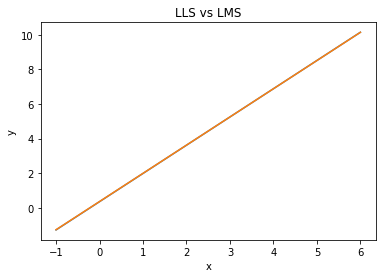

In [47]:
i = np.arange(-1, 7)
j = 1.63154731*i + 0.35465501
k = 1.62940456*i + 0.36294148
plt.plot(i, j)
plt.plot(i, k)
plt.title("LLS vs LMS")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

For LLS method, we have w = [0.38733906 1.60944206].In terms of LMS, weights are [0.36294148 1.62940456]. These two lines are actually very close to each other. In terms of computation time, LLS is much more efficient than LMS. However, for high dimension data, LMS method is better than LLS.

(4) Repeat the simulation study in b) with different learning rates , and explain your findings.

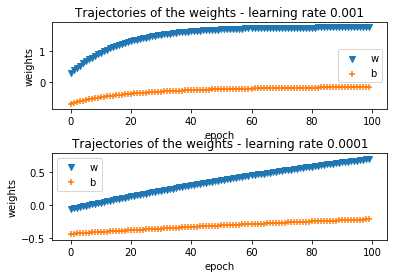

In [50]:
l_rates = [0.001, 0.0001, 0.5, 0.05, ]
epoch = 100
w_record = np.zeros([4, 100])
b_record = np.zeros([4, 100])

for num, l_rate in enumerate(l_rates):
    w = np.random.randn(1,x.shape[1]).flatten()
    for i in range(epoch):
        w_record[num, i] = (w[1])
        b_record[num, i] = (w[0])
        for j, label in enumerate(y):
            e = y[j] - x[j, :].dot(w)
            w = w + l_rate * e *(x[j])
        

rge = np.array(range(100))
plt.subplots_adjust(wspace =0.2, hspace =0.5)
plt.subplot(2,1,1)
plt.scatter(rge,w_record[0, :], label = 'w', marker = 'v')
plt.plot(rge,w_record[0, :])
plt.scatter(rge,b_record[0, :], label = 'b', marker = '+')
plt.plot(rge,b_record[0, :])
plt.title('Trajectories of the weights - learning rate %r' %(l_rates[0]))
plt.xlabel("epoch")
plt.ylabel("weights")
plt.legend()
plt.subplot(2,1,2)
plt.scatter(rge,w_record[1, :], label = 'w', marker = 'v')
plt.plot(rge,w_record[1, :])
plt.scatter(rge,b_record[1, :], label = 'b', marker = '+')
plt.plot(rge,b_record[1, :])
plt.title('Trajectories of the weights - learning rate %r' %(l_rates[1]))
plt.xlabel("epoch")
plt.ylabel("weights")
plt.legend()
plt.show()


For the smaller learning rate like 0.001 and 0.0001. It can converge like 0.001 but probably needs more epoches like 0.0001. 

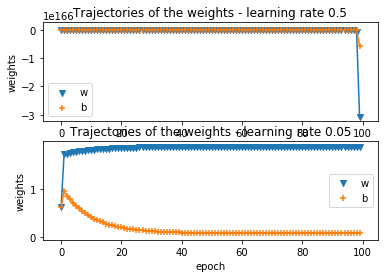

In [53]:
plt.subplot(2,1,1)
plt.scatter(rge,w_record[2, :], label = 'w', marker = 'v')
plt.plot(rge,w_record[2, :])
plt.scatter(rge,b_record[2, :], label = 'b', marker = '+')
plt.plot(rge,b_record[2, :])
plt.title('Trajectories of the weights - learning rate %r' %(l_rates[2]))
plt.xlabel("epoch")
plt.ylabel("weights")
plt.legend()
plt.subplot(2,1,2)
plt.scatter(rge,w_record[3, :], label = 'w', marker = 'v')
plt.plot(rge,w_record[3, :])
plt.scatter(rge,b_record[3, :], label = 'b', marker = '+')
plt.plot(rge,b_record[3, :])
plt.title('Trajectories of the weights - learning rate %r' %(l_rates[3]))
plt.xlabel("epoch")
plt.ylabel("weights")
plt.legend()
plt.show()

For the larger learning rate, it might fail to converge like 0.5. The reason can be concluded as the Taylor approximation doesn't hold if a very large learning rate is set. 